In [1]:
# Start by importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## read the data file
data = pd.read_csv('/config/workspace/Dataset/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

We can see there few data for columns Glucose, Insulin, Skin thickness, BMI and Blood pressure which 
have value as 0. Thats not possibe. We know that one cannot have these values as 0. we can either remove this data
or simply replace it with their respective mean values. Lets follow the mean imputation.

In [5]:
##Now replacing zero value with the mean of the column
data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())

In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

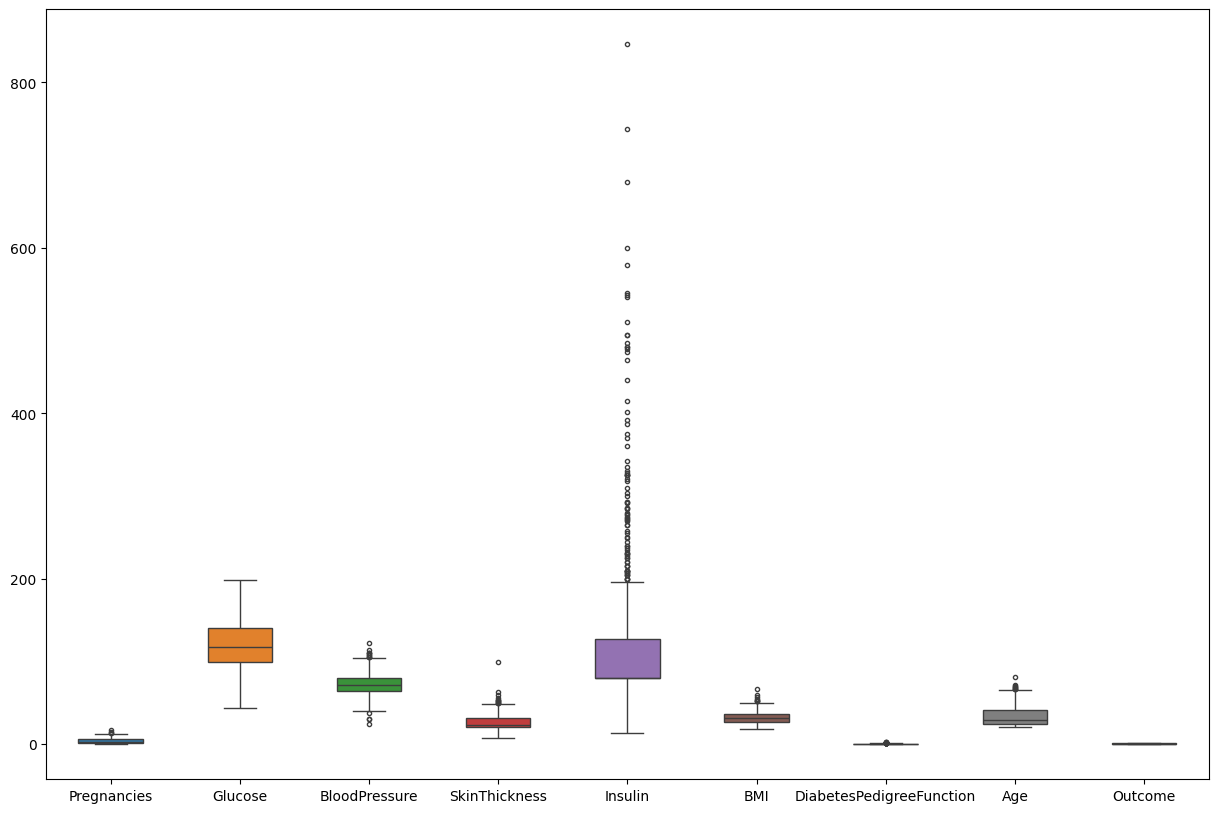

In [7]:
#now we have to dealt with the 0 values
# stll outliers may be present . lets find the outliers

fig,ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data,width=0.5,ax=ax,fliersize=3)

In [8]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [9]:
## divide the data into dependent and independent variable
X= data.drop(columns=['Outcome'])
y=data['Outcome']

In [10]:
# seperate the dataset into train test split
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.25,random_state=0)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((576, 8), (576,), (192, 8), (192,))

## Feature scaling or Standard Scaler

In [11]:
import pickle
def scaler_standard(X_train,X_test):
    scaler=StandardScaler()
    X_train_scaled=scaler.fit_transform(X_train)
    X_test_scaled=scaler.transform(X_test)
    file = open('StandardScaler.pkl','wb')
    pickle.dump(scaler,file)
    file.close()
    return X_train_scaled,X_test_scaled

In [12]:
X_train_scaled, X_test_scaled = scaler_standard(X_train,X_test)

In [13]:
X_test_scaled

array([[-0.82986389,  2.56591881,  0.27922165, ...,  1.46903995,
         2.78665365, -0.96584853],
       [-0.53768687, -0.49968691,  0.11084355, ...,  0.13573925,
        -0.19434743, -0.88246592],
       [ 0.04666716, -1.53266275, -0.89942504, ...,  0.19308552,
        -0.23349189, -0.71570071],
       ...,
       [-0.82986389, -0.43304331, -1.06780314, ..., -1.03985921,
         1.4406865 , -1.04923114],
       [-0.24550986,  0.20007091,  0.44759974, ..., -1.65633158,
        -0.60385869,  1.7857775 ],
       [ 0.33884418, -1.13280114,  0.44759974, ..., -0.72445475,
        -0.63396981,  0.28489057]])

# Box Plot to understand the effect of standard scaler

/tmp/ipykernel_4737/342163371.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


Text(0.5, 1.0, 'X_train After Scaling')

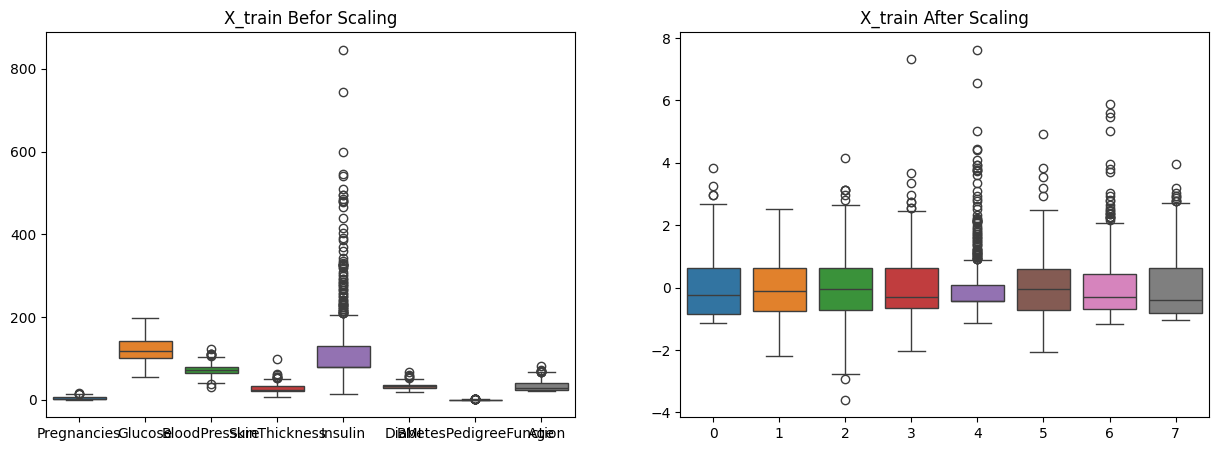

In [14]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('X_train Befor Scaling')
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title("X_train After Scaling")

## Logistic Regression Model

In [15]:
log_reg = LogisticRegression()

In [16]:
log_reg.fit(X_train_scaled,y_train)

LogisticRegression()

In [17]:
## Hyper Parametric tuning
## Grid Search CV
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
#parameters grid
parameters = {
    'penalty':['l1','l2','elasticnet'],
    'C': np.logspace(-3,3,7),
    'solver':['netwon-cg','lfbgs','liblinear']
}


In [18]:
log_reg =LogisticRegression()
clf =GridSearchCV(log_reg,param_grid=parameters,scoring='accuracy',cv=10)

In [19]:
clf.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['netwon-cg', 'lfbgs', 'liblinear']},
             scoring='accuracy')

In [20]:
clf.best_params_

{'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}

In [21]:
clf.best_score_

0.763793103448276

In [22]:
## lets see how our model performs on Test data

y_pred = clf.predict(X_test_scaled)

In [23]:
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0])

In [24]:
print(confusion_matrix(y_pred,y_test))

[[117  26]
 [ 13  36]]


In [25]:
print(accuracy_score(y_pred,y_test))

0.796875


In [26]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86       143
           1       0.58      0.73      0.65        49

    accuracy                           0.80       192
   macro avg       0.74      0.78      0.75       192
weighted avg       0.82      0.80      0.80       192



In [37]:
file = open('ModelForPrediction.pkl','wb')
pickle.dump(log_reg,file)
file.close()
